# Importing libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score



# Load and Preprocess Dataset

In [4]:
df = pd.read_csv("spotify-2023.csv", encoding="latin1")

In [5]:
df.shape

(953, 24)

In [6]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [8]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [9]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [10]:
columns_to_drop = ['track_name', 'artist(s)_name', 'released_year', 'released_month', 'released_day']
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

In [11]:
df.dropna(inplace=True)

In [12]:
df['streams'] = pd.to_numeric(df['streams'].str.replace(',', ''), errors='coerce')
df.columns = df.columns.str.strip().str.lower()  
print(df.columns.tolist()) 


['artist_count', 'in_spotify_playlists', 'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm', 'key', 'mode', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']


In [13]:
df.dropna(subset=['streams'], inplace=True) 
threshold = df['streams'].quantile(0.75)
df['is_popular'] = (df['streams'] >= threshold).astype(int)
df.drop(columns='streams', inplace=True)

df = pd.get_dummies(df, drop_first=True)

df.dropna(inplace=True)

print(df.columns)

Index(['artist_count', 'in_spotify_playlists', 'in_spotify_charts',
       'in_apple_playlists', 'in_apple_charts', 'in_deezer_charts', 'bpm',
       'danceability_%', 'valence_%', 'energy_%',
       ...
       'key_B', 'key_C#', 'key_D', 'key_D#', 'key_E', 'key_F', 'key_F#',
       'key_G', 'key_G#', 'mode_Minor'],
      dtype='object', length=503)


# Split Features and Labels

In [15]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['is_popular'])
y = df['is_popular']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale Features


In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

 # Train Classification Model

In [19]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

 # Evaluate Model

In [21]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8902439024390244
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.93       117
           1       0.91      0.68      0.78        47

    accuracy                           0.89       164
   macro avg       0.90      0.83      0.85       164
weighted avg       0.89      0.89      0.88       164



# Confusion Matrix

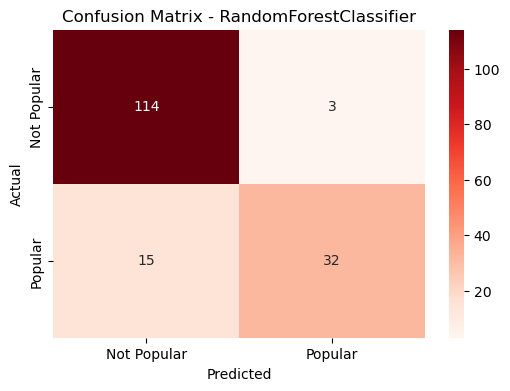

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Not Popular', 'Popular'], yticklabels=['Not Popular', 'Popular'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - RandomForestClassifier')
plt.show()

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Logistic Regression Classifier

In [26]:
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
log_preds = log_model.predict(X_test_scaled)

In [27]:
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, log_preds))
print(confusion_matrix(y_test, log_preds))
print(classification_report(y_test, log_preds))

Logistic Regression:
Accuracy: 0.7378048780487805
[[104  13]
 [ 30  17]]
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       117
           1       0.57      0.36      0.44        47

    accuracy                           0.74       164
   macro avg       0.67      0.63      0.64       164
weighted avg       0.72      0.74      0.72       164



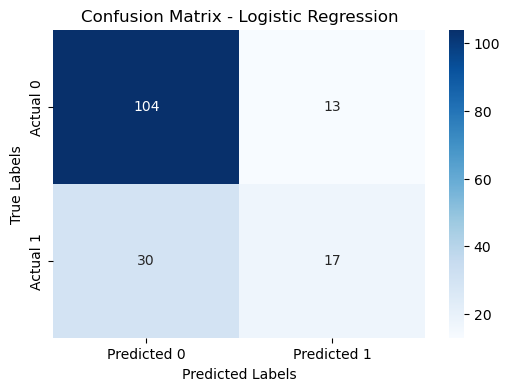

In [56]:
cm = confusion_matrix(y_test, log_preds)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Artificial Neural Network (ANN)

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [30]:
import numpy as np

X_train = np.array(X_train).astype('float32')
y_train = np.array(y_train).astype('int32')  

X_test_scaled = np.array(X_test_scaled).astype('float32')
y_test = np.array(y_test).astype('int32')  

model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

y_pred_ann = (model.predict(X_test_scaled) > 0.5).astype(int)

print("\nArtificial Neural Network")
print("Accuracy:", accuracy_score(y_test, y_pred_ann))
print(confusion_matrix(y_test, y_pred_ann))
print(classification_report(y_test, y_pred_ann))


Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.5108 - loss: 53.3049 - val_accuracy: 0.7328 - val_loss: 14.8772
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7752 - loss: 10.9919 - val_accuracy: 0.8702 - val_loss: 1.4928
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8725 - loss: 2.3329 - val_accuracy: 0.8855 - val_loss: 1.6298
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8818 - loss: 1.5864 - val_accuracy: 0.8855 - val_loss: 1.7201
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9043 - loss: 1.1319 - val_accuracy: 0.8931 - val_loss: 1.1618
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9006 - loss: 0.9760 - val_accuracy: 0.8931 - val_loss: 0.9897
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8799 - loss: 0.8245 - val_accuracy: 0.8321 - val_loss: 1.3237
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8746 - loss: 1.1064 - val_accuracy: 0.7328 - val_

# Confusion Matrix - ANN

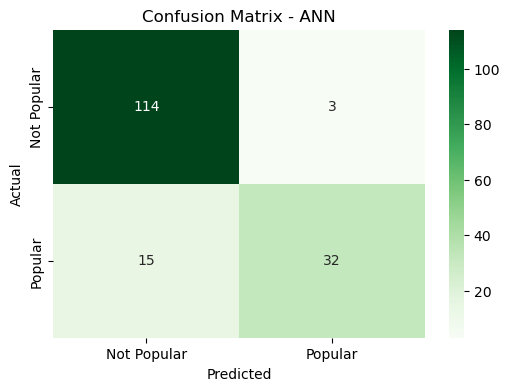

In [60]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Not Popular', 'Popular'], yticklabels=['Not Popular', 'Popular'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - ANN')
plt.show()